# Association Rule

Market Basket Analysis bertujuan menemukan pola-pola hubungan yang sering muncul di dalam data, misalnya data transaksi penjualan. Pola yang dicari inilah yang disebut dengan Association Rule, atau bisa diterjemahkan bebas sebagai hubungan (asosiasi) antara kombinasi beberapa item (barang, orang, produk, atau apapun yang diwakili oleh kata benda) yang sering muncul bersamaan.

Sebuah rule memiliki antecedent (hal yang mengawali) yang ditulis di kiri tanda panah, dan sebuah consequent (efek atau akibat) sebelah kanan anak panah.
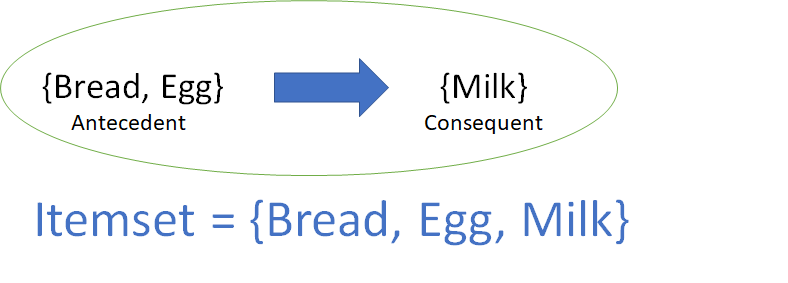

Nilai-nilai yang ada di dalam tanda kurung kurawal {} disebut itemset, bisa terdiri dari satu item atau lebih. Rule diatas menunjukkan bahwa jika roti dan/atau telur dibeli, maka susu (kemungkinan besar) akan dibeli. Secara teoritis artinya telah terbentuk suatu aturan, yaitu kemunculan {roti,telur} mengakibatkan kemunculan susu. 

Note: Rule ini berlaku satu arah, artinya ketika membeli susu, maka {roti,telur} belum tentu akan dibeli.

Association rule tidah hanya bisa dimanfaatkan untuk Market basket analysis. Banyak implementasi lain di industri keuangan misalnya untuk menemukan transaksi kartu kredit yang tidak wajar atau di bidang penelitian ilmiah misalnya untuk mencari pola dalam DNA manusia.

Sebelum mencari pola-pola hubungan antar-itemset, terlebih dahulu membuang itemset yang tidak akan pernah berhubungan satu sama lain. Misalkan rule {roti, detergen} adalah rule yang tidak akan terjadi, atau amat jarang terjadi, tentunya dengan asumsi bahwa seseorang akan membeli sarapan pagi.

Produk diatas tidak akan memberikan kontribusi pada proses analisis, sehingga perlu dikeluarkan dari dataset untuk mencegah komputer menangani data yang terlalu besar. Bila sebuah toko memiliki 10 macam produk, maka diperlukan $2^{10}$= 1.024 kombinasi itemset.

Salah satu algoritma yang populer untuk memilih data bagi keperluan Market Basket Analysis adalah Apriori. Prinsip dasar apriori adalah meyakini bahwa semua subset (sebagian) dari sebuah itemset harus memiliki frekuensi kemunculan yang tinggi.

In [2]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mlxtend as ml
# from scipy import sparse
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

In [25]:
df0 = pd.read_csv("//Users/Won/Library/CloudStorage/OneDrive-UGM365/Self-course/Data Mining/intro to ML Book/ch11/semua_transaksi_ch11b.csv")
df0

,TRX_ID,TRX_TS,PRODUCT_ID,PRODUCT_NAME,SALES
0,85,05/31/17 21.14,263,Cappuccino,34000
1,85,05/31/17 21.14,227,Kopi Tubruk,44000
2,85,05/31/17 21.14,268,Macchiato,26000
3,85,05/31/17 21.14,268,Macchiato,26000
4,85,05/31/17 21.14,268,Macchiato,26000
...,...,...,...,...,...
30498,8850,08/30/19 19.03,233,Rawon,36000
30499,8851,08/26/19 13.28,236,Nasi Putih,7000
30500,8851,08/30/19 19.03,233,Rawon,36000
30501,8852,08/26/19 13.28,236,Nasi Putih,7000


In [26]:
df0.index

RangeIndex(start=0, stop=30503, step=1)

In [27]:
df = pd.read_csv("//Users/Won/Library/CloudStorage/OneDrive-UGM365/Self-course/Data Mining/intro to ML Book/ch11/semua_transaksi_ch11b.csv",parse_dates=['TRX_TS'],index_col=['TRX_ID'])
df

,TRX_TS,PRODUCT_ID,PRODUCT_NAME,SALES
TRX_ID,,,,
85,05/31/17 21.14,263,Cappuccino,34000
85,05/31/17 21.14,227,Kopi Tubruk,44000
85,05/31/17 21.14,268,Macchiato,26000
85,05/31/17 21.14,268,Macchiato,26000
85,05/31/17 21.14,268,Macchiato,26000
...,...,...,...,...
8850,08/30/19 19.03,233,Rawon,36000
8851,08/26/19 13.28,236,Nasi Putih,7000
8851,08/30/19 19.03,233,Rawon,36000


In [6]:
df.index

Int64Index([  85,   85,   85,   85,   85,   85,   85,   85,   86,   86,
            ...
            8848, 8848, 8849, 8849, 8850, 8850, 8851, 8851, 8852, 8852],
           dtype='int64', name='TRX_ID', length=30503)

# Data Profiling

In [29]:
df['PRODUCT_NAME'].value_counts()

Teh Tubruk                     4677
Mineral Water                  2736
Pisang Goreng                  2206
Nasi Putih                     2016
Nasi Goreng Jawa               1810
Kopi Tubruk                    1799
Soto Ayam                      1758
Extra Kerupuk Putih            1567
Rawon                          1441
Bakmi Godog Keju               1415
Bakmi Goreng Jawa              1184
Fresh Orange Juice             1163
Latte                          1077
Teh Tarik                       957
Roti Bakar                      854
Cappuccino                      811
Macchiato                       634
Hot/Ice Lemon Tea               599
Americano                       506
French Fries                    486
Spaghetti Bolognese             303
Espresso                        111
Macchiato                       100
Iced Tea                         87
Milo Dinosaur                    43
Bakwan Goreng                    32
Double Espresso                  22
Hot Chocolate               

In [30]:
df1 = df.drop(['PRODUCT_ID'],axis=1).groupby('PRODUCT_NAME').sum()
df1

,SALES
PRODUCT_NAME,
Americano,14673000
Bakmi Godog Keju,42296000
Bakmi Goreng Jawa,42826000
Bakwan Goreng,832000
Cappuccino,25699000
Double Espresso,616000
Es Batu,10000
Es Teh Susu (Gula Jawa),120000
Espresso,2030000


<AxesSubplot:xlabel='PRODUCT_NAME'>

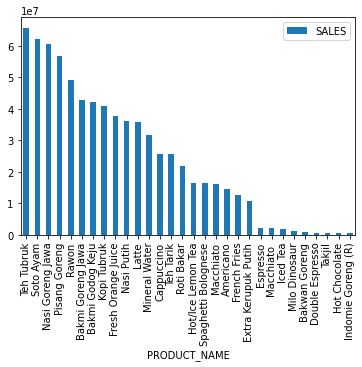

In [32]:
df1.sort_values(by=['SALES'],ascending=False).head(30).plot(kind='bar')

# Transformasi Data

In [33]:
dfHotEncoded = df.pivot_table(index='TRX_ID', columns='PRODUCT_NAME', values='SALES') 
dfHotEncoded

PRODUCT_NAME,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,NaN,NaN,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36000.0,NaN,48000.0,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48000.0,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48000.0,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,22000.0,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,...,NaN,NaN,NaN,NaN,35000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
dfHotEncoded.shape

(8144, 40)

In [35]:
dfHotEncoded = df.pivot_table(index='TRX_ID', columns='PRODUCT_NAME', values='SALES').fillna(0)
dfHotEncoded

PRODUCT_NAME,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,0.0,0.0,0.0,0.0,34000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,48000.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,48000.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,48000.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,34000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22000.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0,...,0.0,0.0,0.0,0.0,35000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
dfHotEncoded[dfHotEncoded>0] = 1
dfHotEncoded

PRODUCT_NAME,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Menentukan Association Rule
Pada association rule, dua konsep pengukuran yang sangat penting untuk diperhatikan adalah support dan confidence. 

Support menentukan seberapa sering suatu itemset muncul dalam data, diukur dalam skala nol hingga satu. Nol artinya tidak pernah muncul dalam data, sementara angka satu berarti itemset tersebut selalu muncul. 

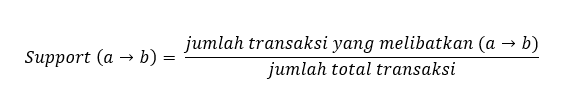

"jumlah transaksi yang melibatkan (a -> b)" dihitung dari frekuensi kemunculan rule {a} -> {b} dalam dataset.

Confidence digunakan untuk menentukan akurasi suatu rule, atau bisa juga dianggap sebagai ukuran seberapa yakin (confident) kita terhadap suatu rule.

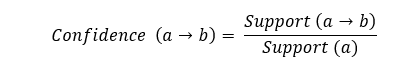 

# Apriori
## Memilih frequent itemset

In [40]:
df2 = apriori(dfHotEncoded, min_support =0.1, use_colnames=True)
df2

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.131508,(Bakmi Godog Keju)
1,0.111370,(Bakmi Goreng Jawa)
2,0.129912,(Extra Kerupuk Putih)
3,0.111616,(Fresh Orange Juice)
4,0.177554,(Kopi Tubruk)
5,0.109283,(Latte)
6,0.224705,(Mineral Water)
7,0.170309,(Nasi Goreng Jawa)
8,0.196832,(Nasi Putih)
9,0.206655,(Pisang Goreng)


## Memilih rule yang kuat

Angka support dan confidence lebih dari atau sama dengan min_support dan min_confidence.

In [15]:
df3 = association_rules(df2, metric ='confidence', min_threshold=0.1)
df3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,0.065734,1.991359
1,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,0.065734,1.544592
2,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,0.024757,1.102712
3,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,0.024757,1.201421
4,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,0.051820,1.235370
5,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,0.051820,1.616986


In [16]:
df3.sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,0.065734,1.991359
5,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,0.051820,1.616986
1,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,0.065734,1.544592
3,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,0.024757,1.201421
4,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,0.051820,1.235370
2,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,0.024757,1.102712


## Mencari petunjuk hubungan dua itemset ketika muncul bersamaan dengan Lift

Lift digunakan untuk mengetahui apakah dua itemset muncul secara bersamaan karena suatu kebetulan atau tidak.

1. Lift = 1 artinya tidak ada hubungan apa-apa antara kedua itemset
2. Lift > 1 artinya ada hubungan positif antara kedua itemset dan keduanya muncul bukan kebetulan belaka
3. Lift < 1 artinya hubungan kedua itemset terlalu lemah.

In [17]:
df4 = association_rules(df2, metric ='lift', min_threshold=1)
df4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,0.065734,1.991359
1,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,0.065734,1.544592
2,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,0.024757,1.102712
3,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,0.024757,1.201421
4,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,0.051820,1.235370
5,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,0.051820,1.616986


In [18]:
df4.sort_values(by=['support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,0.051820,1.235370
5,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,0.051820,1.616986
0,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,0.065734,1.991359
1,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,0.065734,1.544592
2,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,0.024757,1.102712
3,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,0.024757,1.201421


# FP-Growth

In [20]:
fp_growth =fpgrowth(dfHotEncoded, min_support=0.1, use_colnames=True)
fp_growth

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.196832,(Nasi Putih)
1,0.177554,(Kopi Tubruk)
2,0.173502,(Soto Ayam)
3,0.154101,(Rawon)
4,0.224705,(Mineral Water)
5,0.111616,(Fresh Orange Juice)
6,0.170309,(Nasi Goreng Jawa)
7,0.129912,(Extra Kerupuk Putih)
8,0.109283,(Latte)
9,0.342829,(Teh Tubruk)


In [21]:
rules_fp = association_rules(fp_growth, metric="confidence", min_threshold=0.1)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,0.024757,1.102712
1,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,0.024757,1.201421
2,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,0.065734,1.991359
3,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,0.065734,1.544592
4,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,0.051820,1.235370
5,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,0.051820,1.616986


In [22]:
rules_fp.sort_values(by=['support','confidence','lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,0.051820,1.616986
4,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,0.051820,1.235370
2,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,0.065734,1.991359
3,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,0.065734,1.544592
1,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,0.024757,1.201421
0,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,0.024757,1.102712
